In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
Â·Â·Â·Â·Â·Â·Â·Â·Â·Â·
Mounted at /content/drive


In [5]:
%cd '/content/drive/My Drive/IEEE BigMM/IEEE-BigMM'
%ls
%cd 'Code/'

/content/drive/.shortcut-targets-by-id/1wOje_Q9CmqTKviMB46IyoCb-GEO1cmWw/IEEE BigMM/IEEE-BigMM
 Code/   Data/   README.md  'Stats .txt'   temp.txt
/content/drive/.shortcut-targets-by-id/1wOje_Q9CmqTKviMB46IyoCb-GEO1cmWw/IEEE BigMM/IEEE-BigMM/Code


In [6]:
import pandas as pd
import re
import nltk
import string
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("final_dataset.csv")
df.head(20)

Unnamed: 0  ID      tweet_id  ... Refutation  Support  Oppose
0            0   0  1.052240e+18  ...        0.0      1.0     0.0
1            1   1  1.052210e+18  ...        0.0      1.0     0.0
2            2   2  1.052180e+18  ...        0.0      0.0     0.0
3            3   3  1.052160e+18  ...        0.0      0.0     1.0
4            4   4  1.052100e+18  ...        0.0      1.0     0.0
5            5   5  1.052050e+18  ...        0.0      1.0     0.0
6            6   6  1.052010e+18  ...        0.0      0.0     1.0
7            7   7  1.051990e+18  ...        0.0      0.0     0.0
8            8   8  1.051980e+18  ...        0.0      1.0     0.0
9            9   9  1.051940e+18  ...        0.0      0.0     0.0
10          10  10  1.051820e+18  ...        0.0      1.0     0.0
11          11  11  1.051820e+18  ...        0.0      1.0     0.0
12          12  12  1.051740e+18  ...        0.0      0.0     0.0
13          13  13  1.051740e+18  ...        0.0      0.0     0.0
14          14  14  1.051720e+18  ...        0.0      1.0     0.0
15          15  15  1.051710e+18  ...        0.0      1.0     0.0
16          16  16  1.051700e+18  ...        0.0      0.0     0.0
17          17  17  1.051670e+18  ...        0.0      1.0     0.0
18          18  18  1.051670e+18  ...        0.0      1.0     0.0
19          19  19  1.051660e+18  ...        0.0      1.0     0.0

[20 rows x 15 columns]

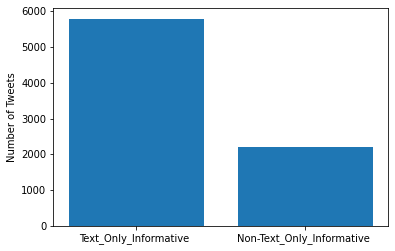

In [8]:
#Visualization
sarcastic=0
for i in range(len(df["Text_Only_Informative"])):
    if df["Text_Only_Informative"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Text_Only_Informative"])-sarcastic
label_values={"Text_Only_Informative " : sarcastic, "Non-Text_Only_Informative " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

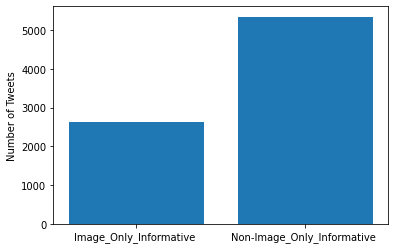

In [9]:
#Visualization
sarcastic=0
for i in range(len(df["Image_Only_Informative"])):
    if df["Image_Only_Informative"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Image_Only_Informative"])-sarcastic
label_values={"Image_Only_Informative " : sarcastic, "Non-Image_Only_Informative " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

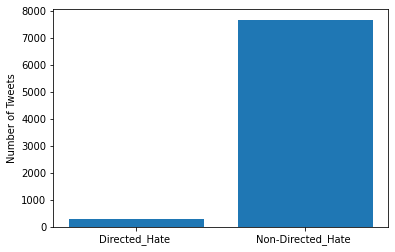

In [10]:
#Visualization
sarcastic=0
for i in range(len(df["Directed_Hate"])):
    if df["Directed_Hate"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Directed_Hate"])-sarcastic
label_values={"Directed_Hate " : sarcastic, "Non-Directed_Hate " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

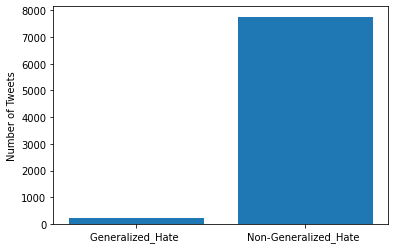

In [11]:
#Visualization
sarcastic=0
for i in range(len(df["Generalized_Hate"])):
    if df["Generalized_Hate"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Generalized_Hate"])-sarcastic
label_values={"Generalized_Hate " : sarcastic, "Non-Generalized_Hate " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

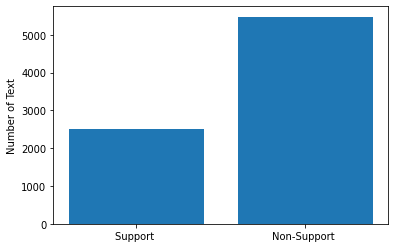

Class imbalance because of low class imbalance even though 60-40 dataset. But skewed data points


In [12]:
#Visualization
sarcastic=0
for i in range(len(df["Support"])):
    if df["Support"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Support"])-sarcastic
label_values={"Support " : sarcastic, "Non-Support " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Text")
plt.show()

print ("Class imbalance because of low class imbalance even though 60-40 dataset. But skewed data points")

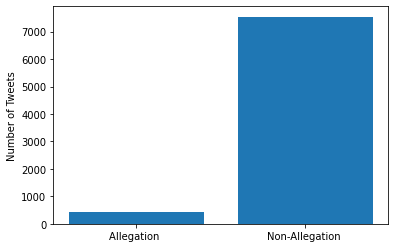

Class Imbalance in 95-5. Accuracy not going above 98 even with ML approaches not going above 98.4.
BiLSTM giving 97.65 aacuracy


In [13]:
#Visualization
sarcastic=0
for i in range(len(df["Allegation"])):
    if df["Allegation"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Allegation"])-sarcastic
label_values={"Allegation " : sarcastic, "Non-Allegation " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

print ("Class Imbalance in 95-5. Accuracy not going above 98 even with ML approaches not going above 98.4.")
print ("BiLSTM giving 97.65 aacuracy")

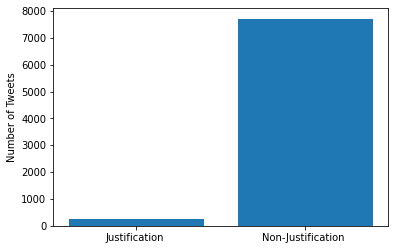

In [14]:
#Visualization
sarcastic=0
#sarcastic is just a variable to keep count of class 1
for i in range(len(df["Justification"])):
    if df["Justification"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Justification"])-sarcastic
label_values={"Justification " : sarcastic, "Non-Justification " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

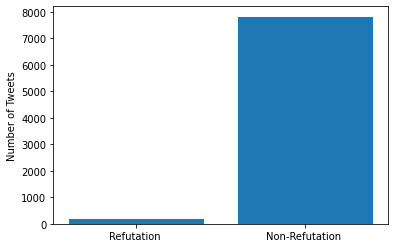

In [15]:
#Visualization
sarcastic=0
for i in range(len(df["Refutation"])):
    if df["Refutation"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Refutation"])-sarcastic
label_values={"Refutation " : sarcastic, "Non-Refutation " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

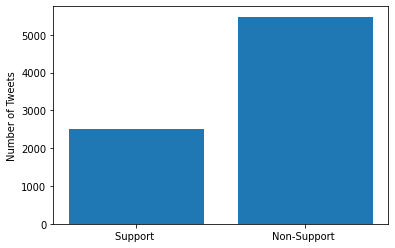

In [16]:
#Visualization
sarcastic=0
for i in range(len(df["Support"])):
    if df["Support"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Support"])-sarcastic
label_values={"Support " : sarcastic, "Non-Support " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

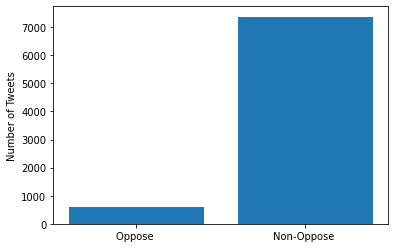

In [ ]:
#Visualization
sarcastic=0
for i in range(len(df["Oppose"])):
    if df["Oppose"].iloc[i]==1:
        sarcastic+=1
normal=len(df["Oppose"])-sarcastic
label_values={"Oppose " : sarcastic, "Non-Oppose " : normal}
plt.bar(label_values.keys(),label_values.values(),align="center")
plt.ylabel("Number of Tweets")
plt.show()

In [17]:
for i,tweet in enumerate(df.text):
    import re
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0â€“9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0â€“9@:%_\+.~#?&//=]*)', '' , tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\n', ' ', tweet, flags=re.MULTILINE)
    df.text[i] = tweet

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
for i,tweet in enumerate(df.text):
    import re
    tweet = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0â€“9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0â€“9@:%_\+.~#?&//=]*)', '' , tweet, flags=re.MULTILINE)
    tweet = re.sub(r'[-a-zA-Z0â€“9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0â€“9@:%_\+.~#?&//=]*)', '', tweet, flags=re.MULTILINE)
    df.text[i] = tweet

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
df.head(20)

Unnamed: 0  ID      tweet_id  ... Refutation  Support  Oppose
0            0   0  1.052240e+18  ...        0.0      1.0     0.0
1            1   1  1.052210e+18  ...        0.0      1.0     0.0
2            2   2  1.052180e+18  ...        0.0      0.0     0.0
3            3   3  1.052160e+18  ...        0.0      0.0     1.0
4            4   4  1.052100e+18  ...        0.0      1.0     0.0
5            5   5  1.052050e+18  ...        0.0      1.0     0.0
6            6   6  1.052010e+18  ...        0.0      0.0     1.0
7            7   7  1.051990e+18  ...        0.0      0.0     0.0
8            8   8  1.051980e+18  ...        0.0      1.0     0.0
9            9   9  1.051940e+18  ...        0.0      0.0     0.0
10          10  10  1.051820e+18  ...        0.0      1.0     0.0
11          11  11  1.051820e+18  ...        0.0      1.0     0.0
12          12  12  1.051740e+18  ...        0.0      0.0     0.0
13          13  13  1.051740e+18  ...        0.0      0.0     0.0
14          14  14  1.051720e+18  ...        0.0      1.0     0.0
15          15  15  1.051710e+18  ...        0.0      1.0     0.0
16          16  16  1.051700e+18  ...        0.0      0.0     0.0
17          17  17  1.051670e+18  ...        0.0      1.0     0.0
18          18  18  1.051670e+18  ...        0.0      1.0     0.0
19          19  19  1.051660e+18  ...        0.0      1.0     0.0

[20 rows x 15 columns]

In [20]:
for i,tweet in enumerate(df.text):
    #Remove hyperlinks
    #Removing links from all tweets gathered from scraping the data
    temp = re.sub(r'https?:\/\/.*\/[a-zA-Z0-9]*', '', tweet)
    df.text[i] = temp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
df.head(10)
#Text be moving even though checkpoint is reached 

Unnamed: 0  ID      tweet_id  ... Refutation  Support  Oppose
0           0   0  1.052240e+18  ...        0.0      1.0     0.0
1           1   1  1.052210e+18  ...        0.0      1.0     0.0
2           2   2  1.052180e+18  ...        0.0      0.0     0.0
3           3   3  1.052160e+18  ...        0.0      0.0     1.0
4           4   4  1.052100e+18  ...        0.0      1.0     0.0
5           5   5  1.052050e+18  ...        0.0      1.0     0.0
6           6   6  1.052010e+18  ...        0.0      0.0     1.0
7           7   7  1.051990e+18  ...        0.0      0.0     0.0
8           8   8  1.051980e+18  ...        0.0      1.0     0.0
9           9   9  1.051940e+18  ...        0.0      0.0     0.0

[10 rows x 15 columns]

In [22]:
(string.punctuation)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
line = "1234567 7852853427.111 https://en.wikipedia.org/wiki/Dictionary_(disambiguation)"

In [24]:
print(re.sub(r'\b\d+(?:\.\d+)?\s+', '', line))

https://en.wikipedia.org/wiki/Dictionary_(disambiguation)


In [25]:
string_punctuation2='!"#$%&\()*+-/:;<=>?@[\\]^_`{|}~'
def remove_punct(text):
    text  = "".join([char for char in text if char not in string_punctuation2])
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text)
    return text

df['text'] = df['text'].apply(lambda x: remove_punct(x))
df.head(10)

Unnamed: 0  ID      tweet_id  ... Refutation  Support  Oppose
0           0   0  1.052240e+18  ...        0.0      1.0     0.0
1           1   1  1.052210e+18  ...        0.0      1.0     0.0
2           2   2  1.052180e+18  ...        0.0      0.0     0.0
3           3   3  1.052160e+18  ...        0.0      0.0     1.0
4           4   4  1.052100e+18  ...        0.0      1.0     0.0
5           5   5  1.052050e+18  ...        0.0      1.0     0.0
6           6   6  1.052010e+18  ...        0.0      0.0     1.0
7           7   7  1.051990e+18  ...        0.0      0.0     0.0
8           8   8  1.051980e+18  ...        0.0      1.0     0.0
9           9   9  1.051940e+18  ...        0.0      0.0     0.0

[10 rows x 15 columns]

In [26]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

# df['text'] = df['text'].apply(lambda x: tokenization(x.lower()))
# df.head(10)

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
separator=' '
df['text'] = df['text'].apply(lambda x: separator.join(remove_stopwords(tokenization(x.lower()))))
df.head(10)

Unnamed: 0  ID      tweet_id  ... Refutation  Support  Oppose
0           0   0  1.052240e+18  ...        0.0      1.0     0.0
1           1   1  1.052210e+18  ...        0.0      1.0     0.0
2           2   2  1.052180e+18  ...        0.0      0.0     0.0
3           3   3  1.052160e+18  ...        0.0      0.0     1.0
4           4   4  1.052100e+18  ...        0.0      1.0     0.0
5           5   5  1.052050e+18  ...        0.0      1.0     0.0
6           6   6  1.052010e+18  ...        0.0      0.0     1.0
7           7   7  1.051990e+18  ...        0.0      0.0     0.0
8           8   8  1.051980e+18  ...        0.0      1.0     0.0
9           9   9  1.051940e+18  ...        0.0      0.0     0.0

[10 rows x 15 columns]

In [29]:
# ps = nltk.PorterStemmer()

# def stemming(text):
#     text = [ps.stem(word) for word in text]
#     return text

# df['text'] = df['text'].apply(lambda x: stemming(x))
# df.head(10)

In [30]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [31]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['text'] = df['text'].apply(lambda x: separator.join(lemmatizer(tokenization(x))))
# type(df['text'].apply(lambda x: lemmatizer(tokenization(x))).head(10)[0])
df.head(10)

Unnamed: 0  ID      tweet_id  ... Refutation  Support  Oppose
0           0   0  1.052240e+18  ...        0.0      1.0     0.0
1           1   1  1.052210e+18  ...        0.0      1.0     0.0
2           2   2  1.052180e+18  ...        0.0      0.0     0.0
3           3   3  1.052160e+18  ...        0.0      0.0     1.0
4           4   4  1.052100e+18  ...        0.0      1.0     0.0
5           5   5  1.052050e+18  ...        0.0      1.0     0.0
6           6   6  1.052010e+18  ...        0.0      0.0     1.0
7           7   7  1.051990e+18  ...        0.0      0.0     0.0
8           8   8  1.051980e+18  ...        0.0      1.0     0.0
9           9   9  1.051940e+18  ...        0.0      0.0     0.0

[10 rows x 15 columns]

In [38]:
temp = df['text']
temp2=[]
for s in temp:
    temp2+=[str(type(s))]

In [42]:
i = 0
for tmp in temp:
    if(str(type(tmp))=="<class 'float'>"):
        print(i, tmp)
    i+=1

In [39]:
import numpy as np
np.unique(temp2)

array(["<class 'str'>"], dtype='<U13')

In [ ]:
# df.to_csv("clean_datav4.csv")

In [ ]:
%ls

Bert_sarcasm.ipynb         clean_datav3.csv   Sarcasm/
Bert_sarcasmv2colab.ipynb  clean_datav4.csv   Support_Using_ML_Classifier.ipynb
Bert_sarcasmv3colab.ipynb  Data_clean.ipynb
clean_datav2.csv           final_dataset.csv
